Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.3001 - val_loss: 0.2577
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.2565 - val_loss: 0.2552
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2541 - val_loss: 0.2527
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2520 - val_loss: 0.2507
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2473 - val_loss: 0.2427
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2405 - val_loss: 0.2380
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2384 - val_loss: 0.2373
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2368 - val_loss: 0.2326
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2167 - val_loss: 0.2049
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.2013 - val_loss: 0.1982
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1963 - val_loss: 0.1948
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━

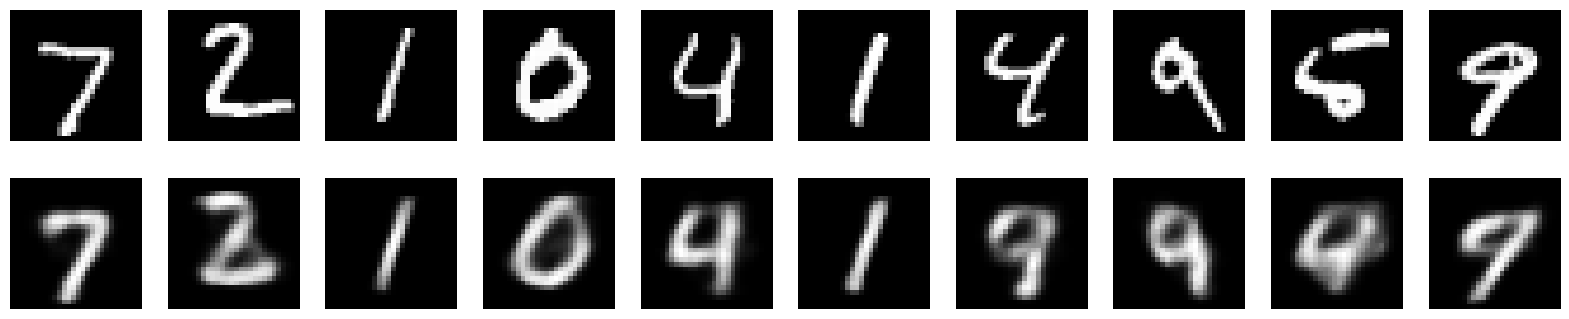

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu",activity_regularizer=regularizers.l1(1e-5))(input_img)  # sparsity
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(32, activation="sigmoid")(encoded)  
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
output_img = Dense(784, activation="sigmoid")(decoded)
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)
decoded_imgs = autoencoder.predict(x_test[:10])
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()